# ATU - Programming and Scripting Project 2023

##### analysis.py
### Author: Norbert Antal

## Summary of the Iris dataset

The Iris flower data set, also known as Fisher’s Iris data set, is a multivariate data set that was introduced by British statistician and biologist Ronald Fisher. <br>The data was collected by Edgar Anderson to quantify the morphologic variation of Iris flowers of three related species and was utilised by Fisher to demonstrate the use of linear discriminant analysis in his 1936 paper titled “The use of multiple measurements in taxonomic problems” published in the Annals of Eugenics.
<br>Today the dataset is widely used as a typical test case for statistical classification in machine learning. 
The Iris dataset contains 50 samples of three Iris flower species: Iris setosa, Iris virginica, and Iris versicolor. Each sample has four features measured in centimetres: sepal and petal length and width. Using these four variables, Ronald Fisher developed a linear discriminant model to differentiate between the species.*(Ref: Wikipedia 2023, (https://en.wikipedia.org/wiki/Iris_flower_data_set)*

Importing relevant libraries<br>
+ numpy - is a library for adding support for large, multi-dimensional arrays along with a large collection of high-level mathematical functions to operate on these arrays (ref: https://en.wikipedia.org/wiki/NumPy)
+ pandas - for data manipulation and analysis (ref: https://en.wikipedia.org/wiki/Pandas_(software))
+ matplotlib - for creating graphical representation of data (ref: https://en.wikipedia.org/wiki/Matplotlib)
+ seaborn - same as above with extended finctionality and styling options (ref: https://en.wikipedia.org/wiki/Matplotlib)

In [2]:
import numpy as np # for mathematical functions
import pandas as pd # for creating and manipulating dataframe
import matplotlib.pyplot as plt # for creating graphical representation of data
import seaborn as sns # # for creating prettier graphical representation of data

## Reading in Iris dataset and add headers

#### Datasource:
iris.data and iris.names files downloaded from https://archive.ics.uci.edu/ml/datasets/iris in a comma-separated value file format

#### Loading data
Data will be analised using Pandas which is a popular data analysis library in Python that provides user friendly data structures and data analysis tools. A Pandas DataFrame is a two-dimensional table with labeled columns and rows, similar to a spreadsheet. (ref: https://towardsdatascience.com/a-python-pandas-introduction-to-excel-users-1696d65604f6)
<br>

+ Read in iris dataset from filename stored in 'SOURCEDATA'
+ adding headers manually from downloaded iris.names source file
+ combine with pandas to create a dataframe storedf as 'df'

In [3]:
SOURCEDATA="iris.data" # store filename
# create headers, taking header names manually from "iris.names" source file
headers=[
    "sepal length (cm)", 
    "sepal width (cm)", 
    "petal length (cm)", 
    "petal width (cm)",
    "species"]
# combine the two into a dataframe using pandas read_csv function and store the dataframe in 'df' //read_csv ref: (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
df=pd.read_csv(SOURCEDATA, names=headers)

Review dataframe

In [17]:
df.head() # check ing labels and data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Project task 1. Output a summary of each variable to a single text file
<br>
Pandas DataFrame describe() method returns a description of the data in the DataFrame. The description -if the data is numeric- contains the following information: 
+ count - The number of not-empty values.
+ mean - The average (mean) value.
+ std - The standard deviation.
+ min - the minimum value.
+ 25% - The 25% percentile*.
+ 50% - The 50% percentile*.
+ 75% - The 75% percentile*.
+ max - the maximum value.
<br>(ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
<br>(ref: https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,std%20%2D%20The%20standard%20deviation)

In [4]:
df.describe() #ref: (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This summary reveals that there are 150 values for each measurement which makes comparison easier. It also shows that based on the standard variation (std) figures, sepal width values have the lowest variation and the petal length values have the highest. It is more useful to separate these figures by species.

In [58]:
#conditional filtering ref: https://www.kdnuggets.com/2022/12/five-ways-conditional-filtering-pandas.html
irises=['Iris-setosa','Iris-versicolor','Iris-virginica'] # we know from the source that there are only 3 species so the list for species can be set manually.
for i in irises:
    print(i,'\n',df.loc[df['species']==i][headers[0:4]].describe()) #this will iterate through all species and only .describes() data relevant to the species in the current iteration


Iris-setosa 
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.418000           1.464000   
std              0.35249          0.381024           0.173511   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.125000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count          50.00000  
mean            0.24400  
std             0.10721  
min             0.10000  
25%             0.20000  
50%             0.20000  
75%             0.30000  
max             0.60000  
Iris-versicolor 
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          50.000000         50.000000          50.000000   
mean            5.

### Output summary to a text file.


In [76]:
#output to string ref: https://stackoverflow.com/questions/31247198/python-pandas-write-content-of-dataframe-into-text-file
#describe().to_string ref: https://stackoverflow.com/questions/34097038/issue-calling-to-string-with-float-format-on-pandas-dataframe
with open('summary.txt','w') as f:
    f.write(f"THE SUMMARY OF EACH VARIABLE IN THE IRIS DATASHEET\n\n{df.describe().to_string()}")
    f.write(f"\n\n\nTHE SUMMARY OF EACH VARIABLE BY SPECIES IN THE IRIS DATASHEET\n")
    for i in irises:
        f.write(f"\n\t\t\t\t\t{i}\n\n{df.loc[df['species']==i][headers[0:4]].describe().to_string()}\n")
    

## Project task 2. Create histogram of each variable and save results in png files

+ Created a function 'fn_pnghist(column)' to plot a histogram for each variable (the measurements of the sepal and petal dimensions) 
+ The 'column' argument stores the data frame column header label for the different variables for the histogram.
+ Creating a function instead of making individual plots, allows for setting a custom style only once and having a uniform style for each histogram (ref: https://matplotlib.org/stable/tutorials/introductory/customizing.html)
+ save the histogram of each variable to png files using **savefig** method (ref: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/)
+ set histogram title to equal header label so data in each histogram can be identified

In [6]:
# create a function to draw up histograms with column data as variable and set custom style
# ref: https://www.geeksforgeeks.org/how-to-set-plot-background-color-in-matplotlib/
# ref: https://matplotlib.org/stable/tutorials/introductory/customizing.html
# adding save to .png file feature to the previous function to save the histograms with column data as variable and column name as file name
def fn_pnghist(column):
    plt.style.use('fast')
    plt.grid(True, color="#F3E4C0", linestyle="dotted")
    df[column].hist(bins=10, color="#5D3FD3") #Iris is a vivid shade of violet-tinged blue with the hex code #5D3FD3 (ref: google.com)
    plt.suptitle(f"Histogram of {column}")
    plt.savefig(f"{column}.png") # save plot ref: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
    plt.show() # turns out plt.show() must be left in the end of the function to avoide having all histograms on one plot 💁


Batch plotting and saving all individual histograms in one go by creating a **for** loop to cycle through the relevant data frame columns in *iris data* and call the 'fn_histpng(column)' function to draw a histogram with each variable as per their column label.<br>
As 'headers' was already established to store data frame column header labels in a list, it was reused for the **for** loop.
The last item of the list was sliced out from the loop in order to exclude 'species' which is the last column header label and is not a flower measurement.

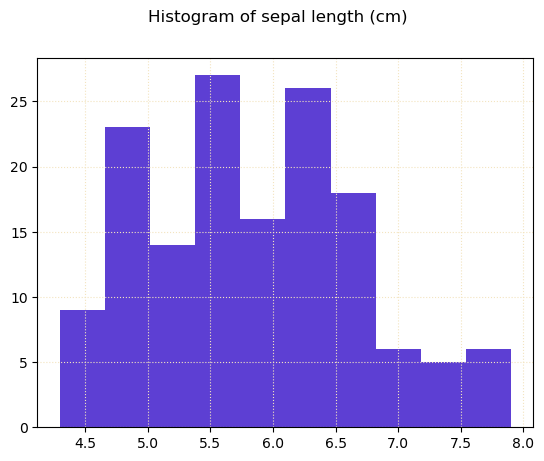

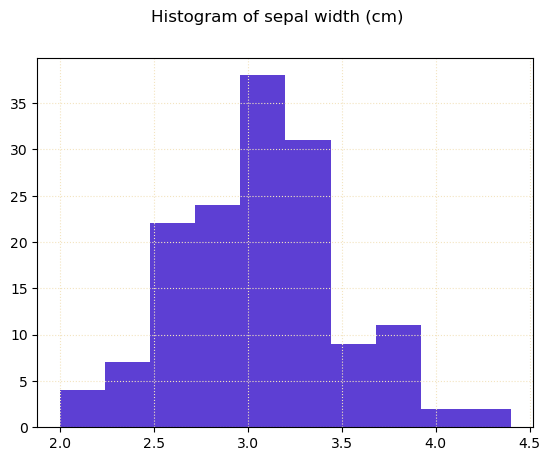

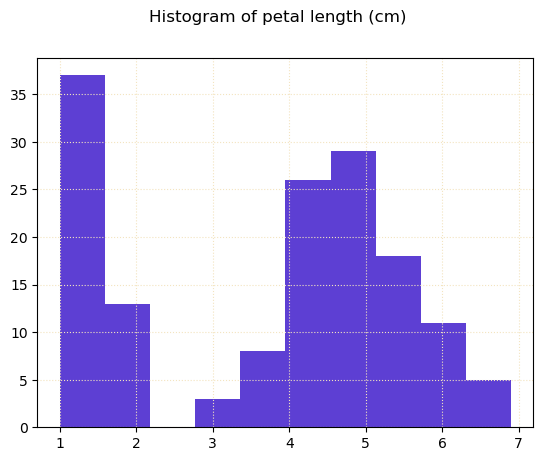

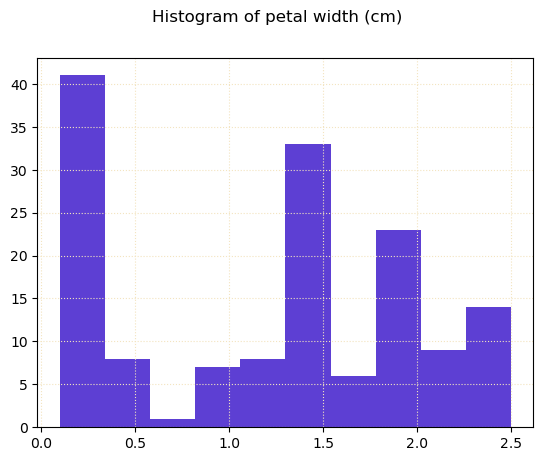

In [7]:
for h in headers[:-1]: # to avoid including 'species' column which is not a measurement, the last item is excluded.
    fn_pnghist(h)

Create a scatter plot of each pair of variables and output the result into one .png file

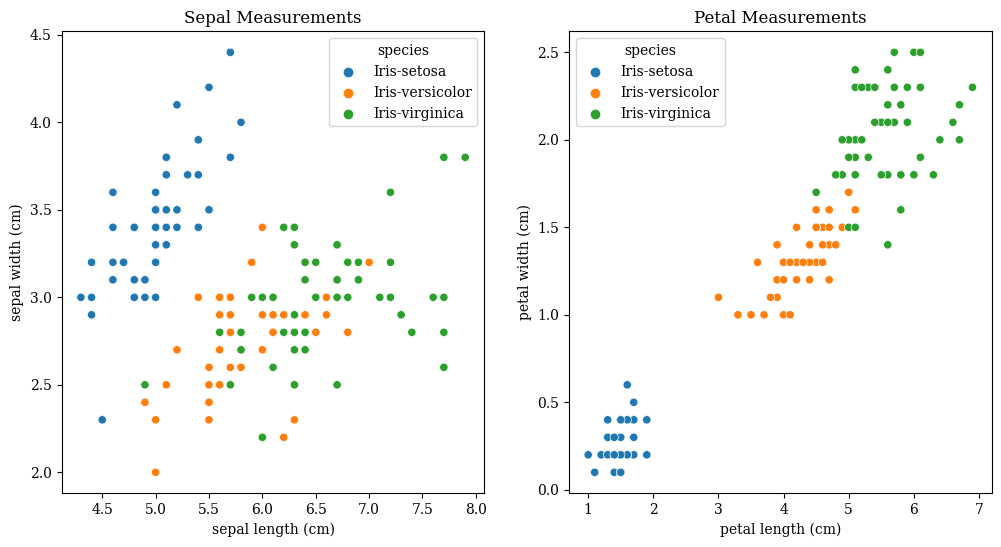

In [8]:
#-----Set plot style 
plt.style.use('fast') #ref: https://matplotlib.org/stable/gallery/style_sheets/index.html
plt.rc("font", family="serif")# default text style ref: customise default style ref: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

#-----two plots side by side ref: https://realpython.com/python-matplotlib-guide/#subplots, ref: https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side
fig, axes = plt.subplots(ncols=2, figsize=(12, 6)) #create a plot object with 2 subplots (specified in 'ncols') and set plotsize 12x6

#-----1. draw scatter plot for sepal variables which are the first two headers stored in 'ax_x' and 'ax_y'
ax_x = headers[0] #"sepal width (cm)"
ax_y = headers[1] #"sepal length (cm)"
sns.scatterplot(data=df, x=ax_x, y=ax_y, hue='species', ax=axes[0])
#-----labels and title for above
axes[0].set_xlabel(ax_x)
axes[0].set_ylabel(ax_y)
axes[0].set_title("Sepal Measurements")
#-----2. draw scatter plot for petal variables which are the next two headers stored in 'ax_x' and 'ax_y'
ax_x = headers[2] #"petal width (cm)"
ax_y = headers[3] #"petal length (cm)"
sns.scatterplot(data=df, x=ax_x, y=ax_y, hue='species', ax=axes[1])
#-----labels and title for above
axes[1].set_xlabel(ax_x)
axes[1].set_ylabel(ax_y)
axes[1].set_title("Petal Measurements")

#------output to -png
plt.savefig(f"scatters.png")
plt.show()

It's quite clear from the two scatter plots that the best way to visualise the differences between the three Iris species is the scatterplot of the Petal measurements. 

Another way to summarise and visualise the relationships within the data is to run a Seaborn Pairplot. <br>This creates a nice visualisation summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it. ref: https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22#:~:text=The%20Seaborn%20Pairplot%20allows%20us,to%20become%20familiar%20with%20it.


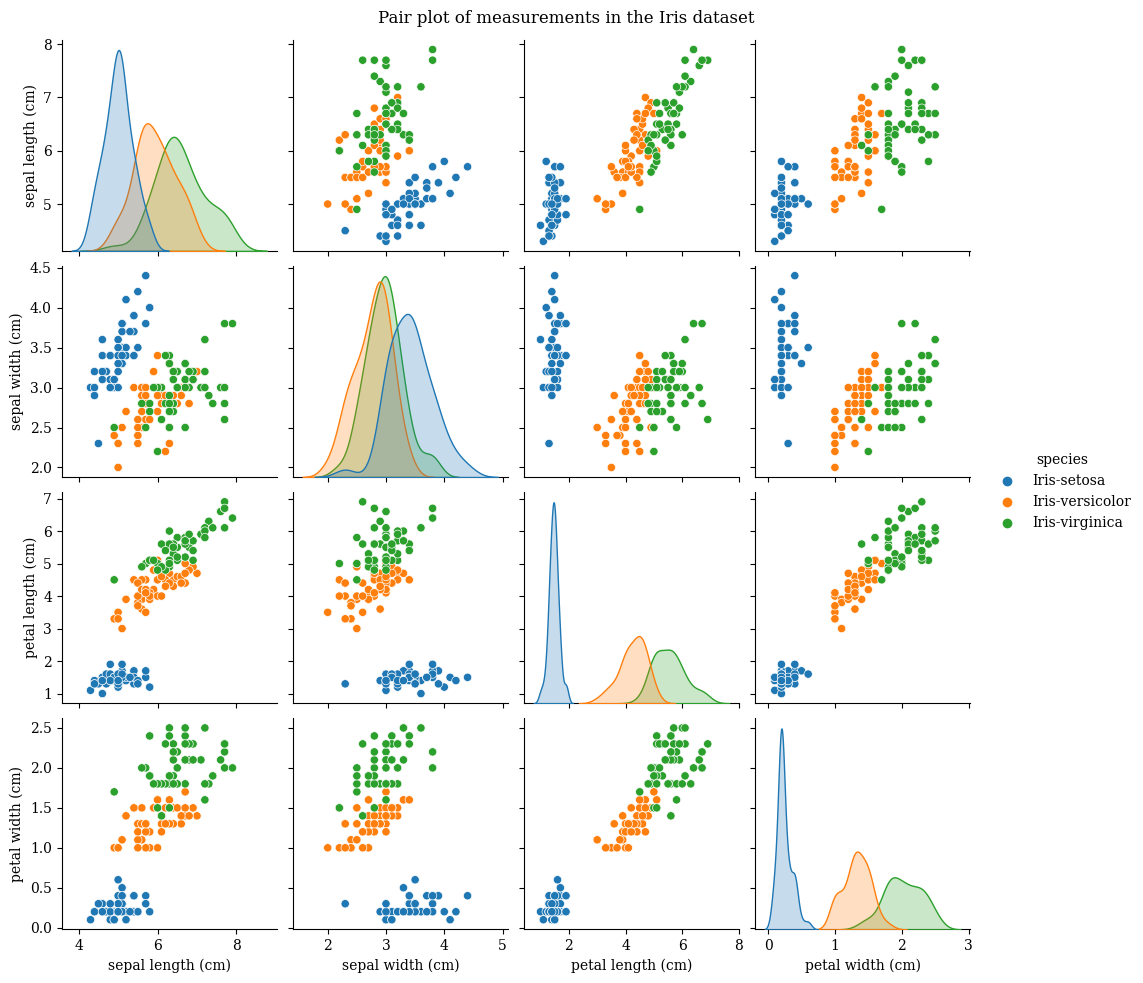

In [9]:
sns.pairplot(df, hue="species")
plt.suptitle("Pair plot of measurements in the Iris dataset") # set title
plt.subplots_adjust(top=0.95) # reducing size of the plot to make more room for the title.
#------output to -png
plt.savefig(f"pairplot.png")
plt.show()

Once again the visualisation of the Iris data shows that the best way to tell apart the different Iris species is to look at the petal measurements. Iris-setosa petal measurements are completely isolate from versicolor and virginica while the latter overlaps

### Conditional mean of measurements plot based on seaborn chart gallery

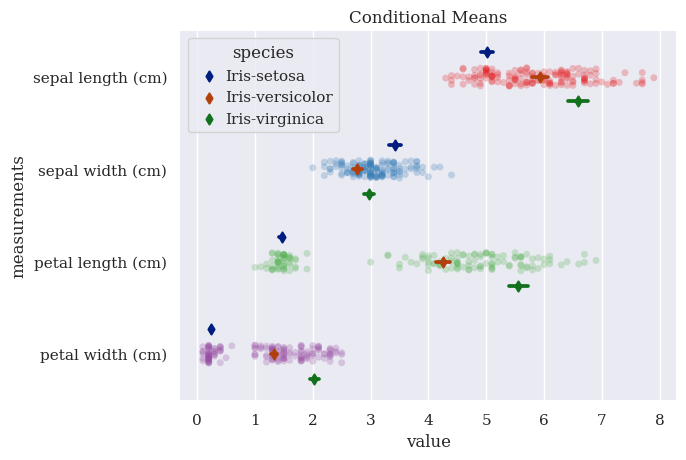

In [10]:
# based on conditional means with opservations from seaborn galery
#https://seaborn.pydata.org/examples/jitter_stripplot.html

sns.set_theme(style="darkgrid", font='serif') # set style

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(df, "species", var_name="measurements") # this will put all measurements into one column

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot( 
    data=iris, x="value", y="measurements", palette="Set1",
    dodge=True, alpha=.25, zorder=1
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=iris, x="value", y="measurements", hue="species",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None
)
ax.set_title("Conditional Means") # set title
# Improve the legend
sns.move_legend(
    ax, loc="upper left", ncol=1, frameon=True, columnspacing=1, handletextpad=0
)

### A proposed practical use:

If we were to identify species in future samples without counting chromosomes we can use the min and max measurements of petal dimensions for each species;

In [11]:
irises=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in irises:
    print(i,'\n',df.loc[df['species']==i][headers[2:4]].describe().loc[['min','max']]) 
    # pandas tutorial to filter data ref: https://www.youtube.com/watch?v=vmEHCJofslg&t=111s
    # limit describe output to min and max ref: https://stackoverflow.com/questions/19124148/modify-output-from-python-pandas-describe, 



Iris-setosa 
      petal length (cm)  petal width (cm)
min                1.0               0.1
max                1.9               0.6
Iris-versicolor 
      petal length (cm)  petal width (cm)
min                3.0               1.0
max                5.1               1.8
Iris-virginica 
      petal length (cm)  petal width (cm)
min                4.5               1.4
max                6.9               2.5


Based on above data, a sample is most likely<br>
+ Iris-setosa with max petal lenght at 1.9cm and max petal with at 0.6cm
+ Iris-versicolor with petal lenght between 3.0-4.5cm and petal width between 1.0-1.4cm
+ Iris-virginica with petal lenght between 5.1-6.9cm and petal width between 1.8-2.5cm
<br>Unfortunately, there will be a mixed bag of Iris-versicolor and Iris-virginica with petal lengths between 4.5-5.1cm and petal width between 1.4-1.8cm, these will require a chromosome count to identify the seecies.

# Trying to combine min and maximum or at least put it on a table.

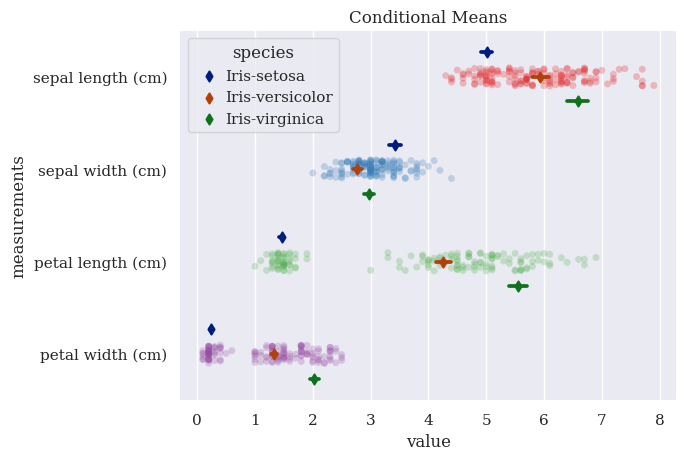

In [12]:
# adding minimum and maximum petal measurements to conditional means plot
#https://seaborn.pydata.org/examples/jitter_stripplot.html


sns.set_theme(style="darkgrid", font='serif') # set style

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(df, "species", var_name="measurements") # this will put all measurements into one column

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot( 
    data=iris, x="value", y="measurements", palette="Set1",
    dodge=True, alpha=.25, zorder=1
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=iris, x="value", y="measurements", hue="species",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None
)
ax.set_title("Conditional Means") # set title
# Improve the legend
sns.move_legend(
    ax, loc="upper left", ncol=1, frameon=True, columnspacing=1, handletextpad=0
)

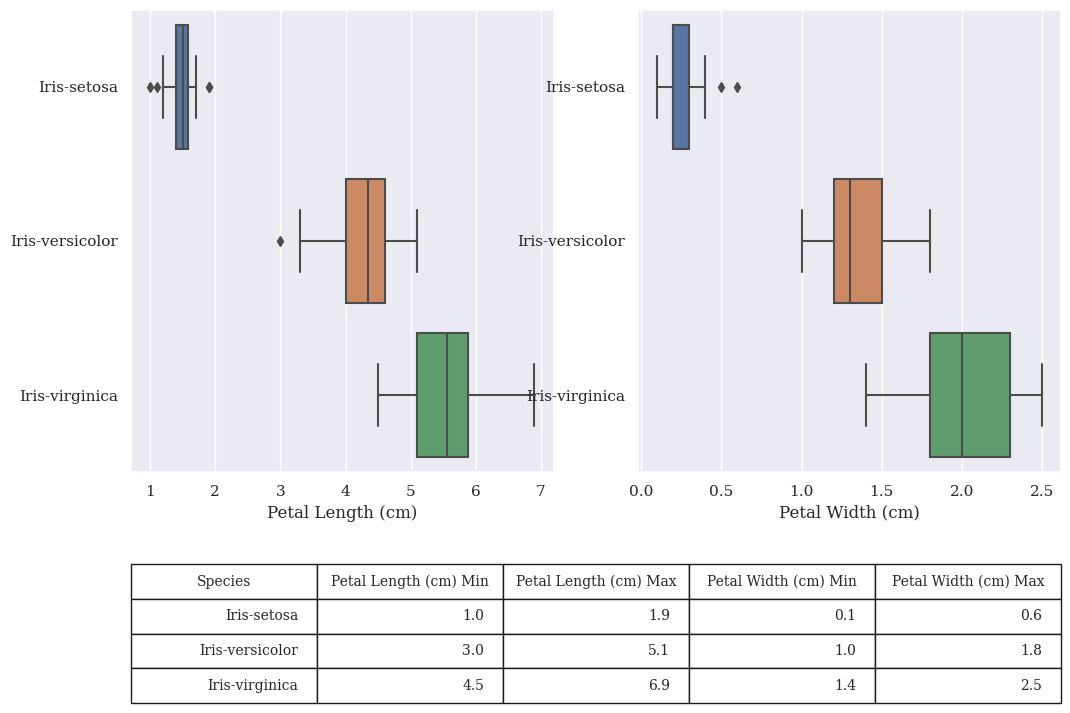

In [13]:







#display min and max petal measurements side by side

# columns
w = headers[3] #"petal width (cm)"
l = headers[2] #"petal length (cm)"

# Create the 2 boxplots
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
sns.boxplot(data=df, x=l, y='species', ax=ax[0])
sns.boxplot(data=df, x=w, y='species', ax=ax[1])

# Add labels to the boxplots
ax[0].set(xlabel='Petal Length (cm)', ylabel='')
ax[1].set(xlabel='Petal Width (cm)', ylabel='')

# Create a legend table
legend_data = []
for species in df['species'].unique():
    l_min = df.loc[df['species'] == species][l].min()
    l_max = df.loc[df['species'] == species][l].max()
    w_min = df.loc[df['species'] == species][w].min()
    w_max = df.loc[df['species'] == species][w].max()
    legend_data.append([species, l_min, l_max, w_min, w_max])
columns = ['Species', 'Petal Length (cm) Min', 'Petal Length (cm) Max', 'Petal Width (cm) Min', 'Petal Width (cm) Max']
legend_table = ax[0].table(cellText=legend_data, colLabels=columns, loc='bottom', bbox=[0, -0.5, 2.2, 0.3])
legend_table.auto_set_font_size(False)
legend_table.set_fontsize(10)

# Show the plot
plt.show()